In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import generate_stats

In [2]:
data_path = os.path.join('db')
filename = 'nu6n.s3db'
sqliteConnection = sqlite3.connect(os.path.join(data_path, filename))
cursor = sqliteConnection.cursor()
print('DB Init')

DB Init


In [3]:
query = 'select sqlite_version();'
cursor.execute(query)
result = cursor.fetchall()
print('SQLite Version is {}'.format(result))

SQLite Version is [('3.47.0',)]


In [57]:
#find all the tables and their schemas
query = """SELECT name FROM sqlite_master  
  WHERE type='table';"""
cursor.execute(query)
tables = cursor.fetchall()
print(f"Table list: \n{'\n'.join(map(str, tables))}")
print(cursor.execute("PRAGMA table_info('Contest')").fetchall())
# for tbl in tables:
#     print(tbl[0], ': ', cursor.execute(f"PRAGMA table_info('{tbl[0]}')").fetchall())
cursor.execute(""" SELECT ContestID, ContestName, StartDate from ContestInstance ORDER BY ContestID""").fetchall()

Table list: 
('Contest',)
('ContestInstance',)
('DBInfo',)
('DBVersionV2',)
('DXLOG',)
('Station',)
('sqlite_stat1',)
('sqlite_stat4',)
('Skeds',)
[(0, 'Name', 'NVARCHAR(10)', 1, None, 1), (1, 'DisplayName', 'NVARCHAR(50)', 0, None, 0), (2, 'CabrilloName', 'NVARCHAR(15)', 1, None, 0), (3, 'Mode', 'NVARCHAR(6)', 1, None, 0), (4, 'DupeType', 'SMALLINT', 0, "'''''''0'''''''", 0), (5, 'Multiplier1Name', 'NVARCHAR(15)', 0, "'''''''''''''''N/A'''''''''''''''", 0), (6, 'Multiplier2Name', 'NVARCHAR(15)', 0, "'''''''''''''''N/A'''''''''''''''", 0), (7, 'Period', 'INT', 1, "'''''''2'''''''", 0), (8, 'PointsPerContact', 'INT', 0, "'''''''0'''''''", 0), (9, 'Multiplier3Name', 'NVARCHAR(15)', 0, None, 0), (10, 'MasterDTA', 'NVARCHAR(255)', 0, None, 0), (11, 'CWMessages', 'NVARCHAR(255)', 0, None, 0), (12, 'SSBMessages', 'NVARCHAR(255)', 0, None, 0), (13, 'DigiMessages', 'NVARCHAR(255)', 0, None, 0), (14, 'CabrilloVersion', 'NVARCHAR(20)', 0, None, 0)]


[(1, 'DELETEDQS', '1900-01-01 00:00:00'),
 (2, 'DX', '1900-01-01 00:00:00'),
 (3, 'SSCW', '2023-11-04 21:00:00'),
 (4, 'CQWWCW', '2023-11-25 00:00:00'),
 (5, 'CQWWCW', '2023-11-25 00:00:00'),
 (6, 'ARRL10M', '2023-12-09 00:00:00'),
 (7, 'RAC', '2023-12-30 00:00:00'),
 (8, 'DX', '2024-01-06 00:00:00'),
 (9, 'NAQPCW', '2024-01-13 18:00:00'),
 (10, 'CQMMDX', '2024-04-20 12:00:00'),
 (11, 'CQWPXCW', '2024-05-25 00:00:00'),
 (12, 'DX', '2024-05-25 00:00:00'),
 (13, 'FD', '2024-06-22 18:00:00'),
 (14, 'IARU', '2024-07-13 12:00:00'),
 (15, 'NAQPCW', '2024-08-03 18:00:00'),
 (16, 'QSOPARTY', '2024-10-05 16:00:00'),
 (17, 'SSCW', '2024-11-02 21:00:00'),
 (18, 'CQWWCW', '2024-11-23 00:00:00'),
 (19, 'ARRL10M', '2024-12-14 00:00:00')]

In [5]:
#fetch a few call for verification
query = """ SELECT * from DXLOG where ContestNR=17"""
qsos = cursor.execute(query).fetchall()
ts = [q[0] for q in qsos]
print(ts[:10])

['2024-12-14 00:01:36', '2024-12-14 00:08:47', '2024-12-14 00:13:17', '2024-12-14 00:15:33', '2024-12-14 00:28:52', '2024-12-14 00:30:30', '2024-12-14 01:52:20', '2024-12-14 01:53:21', '2024-12-14 01:54:58', '2024-12-14 01:57:24']


In [81]:
# convert to pandas dataframe
tbl = 'DXLOG'
ContestNR = 7 # ARRL 10 (4, 17)
print(tbl, ContestNR)
q = f'select * from {tbl} where ContestNR={ContestNR}'
df = pd.read_sql_query(q, sqliteConnection, index_col='TS', parse_dates='TS')
stats, counts_10min, counts_30min, counts_60min = hl.generate_stats(df)
hl.show_stats(stats)

DXLOG 7
total_qsos: 250
name: NAQPCW
op_time: 0 days 04:42:16
rate_ave: 53.1
rate_10min: 108
rate_10min_cnt: 2
rate_30min: 86
rate_30min_cnt: 1
rate_60min: 64
rate_60min_cnt: 1
run_percent: 75.6
continents: {'AS', 'NA', 'OC'}
countries: {'V3', 'K', '8P', 'VE', 'KH6', 'KP2', 'ZF', 'JA'}
sections: {'MB', 'YT', 'ME', 'VA', 'IA', 'NY', 'ID', 'GA', 'UT', 'ON', 'MA', 'WI', 'AZ', 'CA', 'MT', 'MN', 'IN', 'FL', 'SC', 'NV', 'OH', 'KY', 'V3', '8P', 'NM', 'TN', 'MD', 'RI', 'IL', 'NC', 'OR', 'NE', 'TX', 'SK', 'OK', 'PA', 'MS', 'AL', 'CO', 'KS', 'WA', 'BC', 'LA', 'DX', 'KP2', 'HI', 'MI', 'ZF', 'MO', 'NJ'}
active_radios: {0: 13, 1: 237}


In [79]:
import importlib
import helpers as hl

# Re-import the module to apply changes
importlib.reload(hl)

stats, counts_10min, counts_30min, counts_60min = hl.generate_stats(df)
hl.show_stats(stats)

total_qsos: 1
name: DX
op_time: 0 days 00:01:00
rate_ave: 60.0
rate_10min: 6
rate_10min_cnt: 1
rate_30min: 2
rate_30min_cnt: 1
rate_60min: 1
rate_60min_cnt: 1
run_percent: 0.0
continents: {'SA'}
countries: {'CE'}
sections: {''}
active_radios: {2: 1}


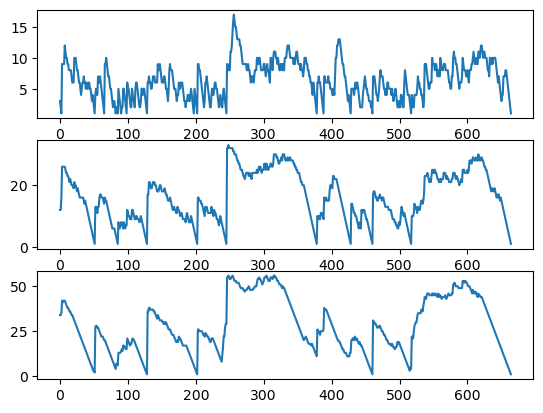

In [33]:
plt.subplot(3, 1, 1)
plt.plot(counts_10min)
plt.subplot(3, 1, 2)
plt.plot(counts_30min)
plt.subplot(3, 1, 3)
plt.plot(counts_60min)
plt.show()

In [44]:
contests = cursor.execute(""" SELECT * from ContestInstance""").fetchall()

In [67]:
df

,Call,Freq,QSXFreq,Mode,ContestName,SNT,RCV,CountryPrefix,StationPrefix,QTH,...,GridSquare,Operator,Continent,RoverLocation,RadioInterfaced,NetworkedCompNr,NetBiosName,IsOriginal,ID,CLAIMEDQSO
TS,,,,,,,,,,,,,,,,,,,,,


In [119]:
# check stats about df
df.columns
df.groupby(['ContestName', 'ContestNR'])['ContestNR'].value_counts()
q = """ SELECT * from DXLOG 
where ContestName='ARRL10M'
and ContestNR<0;"""
arrl10m_1 = pd.read_sql_query(q, sqliteConnection, index_col='TS', parse_dates='TS')
arrl10m_1.drop(['Operator', 'StationPrefix', 'QTH', 'GridSquare', 'Name',
       'Continent', 'RoverLocation', 'RadioInterfaced', 'NetworkedCompNr', 'ID', 'ContactType', 'Comment',
       'NetBiosName', 'IsOriginal', 'CLAIMEDQSO', 'WPXPrefix', 'RadioNR', 'Power', 'Band'], axis=1, inplace=True)
arrl10m_1

,Call,Freq,QSXFreq,Mode,ContestName,SNT,RCV,CountryPrefix,NR,Sect,...,SentNr,Points,IsMultiplier1,IsMultiplier2,Exchange1,ContestNR,isMultiplier3,MiscText,IsRunQSO,Run1Run2
TS,,,,,,,,,,,,,,,,,,,,,
2022-12-11 16:34:08,AE4ED,28067.270,28067.270,CW,ARRL10M,599,599,K,0,AL,...,211,4,0,0,AL,-1,0,,0,2
2022-12-10 06:20:50,K6RB,28035.879,28035.879,CW,ARRL10M,599,599,K,0,CA,...,1,4,1,0,CA,-1,0,,1,2
2022-12-10 06:21:35,K5DDS,28035.879,28035.879,CW,ARRL10M,599,599,K,0,CA,...,2,4,0,0,CA,-1,0,,1,2
2022-12-10 06:22:46,N6TV,28035.879,28035.879,CW,ARRL10M,599,599,K,0,CA,...,4,4,0,0,CA,-1,0,,0,2
2022-12-10 06:22:06,K3TV,28035.879,28035.879,CW,ARRL10M,599,599,K,0,GA,...,3,4,1,0,GA,-1,0,,0,2
2022-12-10 18:48:20,N0HJZ,28095.508,28095.508,CW,ARRL10M,599,599,K,0,MN,...,34,4,0,0,MN,-1,0,,0,2
2022-12-10 18:49:08,N0HJZ,28095.508,28095.508,CW,ARRL10M,599,599,K,0,MN,...,34,4,0,0,MN,-1,0,,0,2


In [125]:
q = """ SELECT * from DXLOG 
where ContestName='ARRL10M'
and (Call='AE4ED' or Call='K6RB' or Call='K5DDS' or Call='N6TV' or Call='K3TV' or Call='N0HJZ')
and ContestNR>0;"""
arrl10m = pd.read_sql_query(q, sqliteConnection, index_col='TS', parse_dates='TS')
arrl10m.drop(['Operator', 'StationPrefix', 'QTH', 'GridSquare', 'Name',
       'Continent', 'RoverLocation', 'RadioInterfaced', 'NetworkedCompNr', 'ID', 'ContactType', 'Comment',
       'NetBiosName', 'IsOriginal', 'CLAIMEDQSO', 'WPXPrefix', 'RadioNR', 'Power', 'Band'], axis=1, inplace=True)
arrl10m

,Call,Freq,QSXFreq,Mode,ContestName,SNT,RCV,CountryPrefix,NR,Sect,...,SentNr,Points,IsMultiplier1,IsMultiplier2,Exchange1,ContestNR,isMultiplier3,MiscText,IsRunQSO,Run1Run2
TS,,,,,,,,,,,,,,,,,,,,,
2022-12-11 16:36:12,AE4ED,28067.270,28067.270,CW,ARRL10M,599,599,K,0,AL,...,213,4,0,0,AL,1,0,,0,2
2022-12-10 18:50:45,N0HJZ,28095.508,28095.508,CW,ARRL10M,599,599,K,0,MN,...,34,4,0,0,MN,1,0,,0,2
2022-12-10 18:39:08,N6TV,28005.336,28005.336,CW,ARRL10M,599,599,K,0,CA,...,31,4,0,0,CA,1,0,,0,2


In [ ]:
if sqliteConnection:
    sqliteConnection.close()
    print('SQLite Connection closed')